In [ ]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris.csv


In [ ]:
uploaded
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1=LabelEncoder()
y1=labelencoder_X_1.fit_transform(Y)
y=pd.get_dummies(y1).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=7)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.17513208, -1.94010658,  0.70755192,  0.40095423],
       [ 1.61008527, -0.09791192,  1.15797344,  0.53185703],
       [ 0.17513208, -0.09791192,  0.59494654,  0.79366261],
       [ 0.41429095, -0.32818625,  0.31343309,  0.13914864],
       [-0.42276508, -1.47955792,  0.03191964, -0.12265695],
       [-0.06402678, -0.78873492,  0.76385461,  0.92456541],
       [ 1.01218811,  0.13236241,  1.04536806,  1.57907938],
       [ 0.41429095, -0.55846059,  0.59494654,  0.79366261],
       [-0.18360621, -1.01900925, -0.13698843, -0.25355974],
       [-1.49897997,  1.28373407, -1.54455569, -1.3007821 ],
       [ 1.25134697,  0.13236241,  0.93276268,  1.186371  ],
       [ 0.65344981, -0.32818625,  0.31343309,  0.13914864],
       [-1.2598211 , -0.09791192, -1.31934493, -1.16987931],
       [-0.42276508,  1.05345974, -1.37564762, -1.3007821 ],
       [-0.54234451,  1.97455707, -1.15043686, -1.03897651],
       [-0.90108281,  1.05345974, -1.31934493, -1.16987931],
       [ 1.49050583, -0.

In [ ]:
y_test.shape

(23, 3)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

Using TensorFlow backend.


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
def built_classifier():

  model=Sequential()
  model.add(Dense(16,kernel_initializer='uniform',activation='relu',input_dim=4))
  # model.add(Dropout(0.2))
  # model.add(Dense(4,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(3,kernel_initializer='uniform',activation='softmax'))
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

model= KerasClassifier(build_fn=built_classifier,batch_size=10,epochs=100)
accuracies=cross_val_score(estimator= model,X=X_train,y=y_train,cv=4,n_jobs=-1)

In [ ]:
accuracies

array([0.96875   , 0.90625   , 0.96875   , 0.96774191])

In [ ]:
model1=Sequential()
model1.add(Dense(16,kernel_initializer='uniform',activation='relu',input_dim=4))
model1.add(Dense(3,kernel_initializer='uniform',activation='softmax'))

model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.2)

Train on 101 samples, validate on 26 samples
Epoch 1/100
 10/101 [=>............................] - ETA: 0s - loss: 1.0980 - accuracy: 0.3000Train on 101 samples, validate on 26 samples
Epoch 1/100
101/101 [==============================] - 0s 1ms/step - loss: 1.0956 - accuracy: 0.6040 - val_loss: 1.0920 - val_accuracy: 0.8077
Epoch 2/100
101/101 [==============================] - 0s 256us/step - loss: 1.0872 - accuracy: 0.7624 - val_loss: 1.0831 - val_accuracy: 0.8077
Epoch 3/100
101/101 [==============================] - 0s 184us/step - loss: 1.0738 - accuracy: 0.7426 - val_loss: 1.0688 - val_accuracy: 0.7308
Epoch 4/100
101/101 [==============================] - 0s 228us/step - loss: 1.0542 - accuracy: 0.7129 - val_loss: 1.0472 - val_accuracy: 0.6538
Epoch 5/100
101/101 [==============================] - 0s 231us/step - loss: 1.0264 - accuracy: 0.7228 - val_loss: 1.0184 - val_accuracy: 0.6923
Epoch 6/100
101/101 [==============================] - 0s 224us/step - loss: 0.9897 - accur

In [ ]:
y_pred=model1.predict(X_test)

In [ ]:
y_pred_class=np.argmax(y_pred,axis=1)
# y_test_class=np.argmax(y_test,axis=1)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred_class)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      0.60      0.67        10
           2       0.56      0.83      0.67         6

    accuracy                           0.74        23
   macro avg       0.77      0.76      0.75        23
weighted avg       0.78      0.74      0.74        23



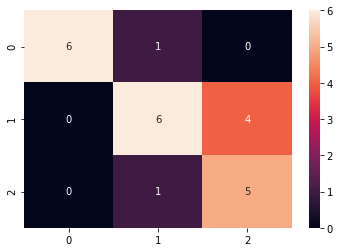

In [ ]:
sns.heatmap(cn,annot=True)